In [2]:
import real_estate_api as rea

from typing import Union, List
from types import ModuleType
from beartype._decor.decormain import beartype
import warnings

import numpy as np
import pandas as pd
import sys
import importlib

from itertools import chain
import random

from sklearn.base import TransformerMixin, BaseEstimator, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import keys as k
keys = k.getKeys()

In [3]:
user_home = rea.get_UserHome(keys['SampleHouse'].strip("\'"))
hoi = rea.get_HousesOfInterest(user_home, n=2000, listed_to_sold_ratio=0.3, verbose=True)
gd = rea.geo_data(hoi['geo'])

Shortfall in listed houses detected, appending 114 of current listing to results.


In [4]:
# Can this be the first step in the pipeline or no?
fg = rea.FeatureGenerator(
    houses = hoi['houses'], 
    gd=gd,
    user_home=user_home
)

In [4]:
class ToDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).drop_duplicates(subset=['Property_ID'])

pipe = Pipeline([
    ('format_data', ToDataFrame())
])

output = pipe.fit_transform(fg.features, fg.targets)
output

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,tags,new_construction,distance_to_home,angle_from_home
0,2713193735,0,0,6,1,0,0,1930,34665,5690,2,1,7,"[city_view, community_outdoor_space, den_or_of...",False,6.956224,2.511557
1,2659298958,0,0,1,1,0,0,1979,6500,1660,1,1,5,"[community_outdoor_space, den_or_office, dinin...",False,10.862586,1.688721
2,1093027260,1,1,2,1,1,0,2012,1975,1780,1,1,3,"[city_view, dining_room, dishwasher, energy_ef...",False,1.047090,1.788632
3,1648537949,1,1,2,0,0,0,1962,7618,3310,2,1,6,"[community_outdoor_space, dining_room, family_...",False,0.179029,0.598855
4,1757015623,1,1,3,2,0,0,1911,3376,2800,0,1,5,"[dining_room, forced_air, hardwood_floors, oce...",False,6.660062,2.158812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,1627256650,0,128,1,1,1,0,1928,4452,2470,0,1,3,"[central_air, city_view, community_outdoor_spa...",False,3.265067,-3.113212
1809,1311822489,0,128,3,0,0,0,1953,8037,3610,2,1,4,"[carport, central_air, community_outdoor_space...",False,6.987278,1.259727
1810,2102420682,0,128,1,1,0,0,1947,6395,2284,0,1,3,"[community_outdoor_space, den_or_office, dinin...",False,4.747036,-2.757511
1811,2141376707,0,124,1,1,1,0,1945,5000,2380,1,1,4,"[community_clubhouse, community_gym, community...",False,6.023588,1.357392


In [ ]:
to_data_frame = ToDataFrame()
X_t = to_data_frame.fit_transform(fg.features)
X_t

,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,type,tags,new_construction,distance_to_home
0,1,1,1,1,0,0,1942,7000,1992,1,1,4,single_family,"[community_outdoor_space, den_or_office, dinin...",False,0.087471
1,1,1,1,0,1,0,1988,1071,1300,0,1,2,single_family,"[city_view, community_outdoor_space, community...",False,0.101667
2,2,2,1,1,0,0,1913,3500,1750,0,1,3,single_family,"[community_security_features, den_or_office, d...",False,0.205025
3,2,2,1,1,1,0,1980,8100,3280,2,1,3,single_family,"[community_outdoor_space, dining_room, dishwas...",False,0.068888
4,2,2,1,1,1,0,1948,7680,2180,2,1,4,single_family,"[central_air, community_outdoor_space, dining_...",False,0.083503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0,75,1,1,1,0,1906,4000,2260,1,1,3,single_family,"[city_view, community_outdoor_space, den_or_of...",False,0.091754
971,0,74,3,0,1,0,2006,3600,3340,2,1,5,single_family,"[central_air, community_outdoor_space, communi...",False,0.127658
972,0,73,1,1,0,0,1952,5800,2360,1,1,2,single_family,"[community_outdoor_space, community_security_f...",False,0.080205
973,0,73,1,1,0,0,1906,5700,2880,1,1,2,single_family,"[community_outdoor_space, dining_room, dishwas...",False,0.093157


In [29]:
X_t[X_t['lot_sqft'] > 5_000].sort_values('lot_sqft')

,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,type,tags,new_construction,distance_to_home
870,0,67,2,0,1,0,2004,5001,2320,2,1,4,single_family,"[community_outdoor_space, dishwasher, fireplac...",False,0.211181
225,66,6,3,0,1,0,1990,5001,3190,2,1,5,single_family,"[community_outdoor_space, den_or_office, dinin...",False,0.070469
927,0,0,4,1,0,0,2013,5002,3040,0,2,4,single_family,[],False,0.183211
327,0,10,1,1,0,0,1950,5002,2150,1,1,4,single_family,"[community_outdoor_space, dining_room, dishwas...",False,0.142171
559,0,32,2,0,0,0,1980,5005,1460,0,1,3,single_family,"[community_clubhouse, community_outdoor_space,...",False,0.145353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,53,5,0,1,0,0,1997,43560,560,0,1,2,single_family,"[city_view, community_outdoor_space, community...",False,0.102533
803,0,62,1,0,0,0,1920,43560,691,0,1,2,single_family,"[community_outdoor_space, forced_air, hardwood...",False,0.107248
85,28,5,0,1,1,0,1997,43560,1000,0,1,2,single_family,"[city_view, community_boat_facilities, communi...",False,0.101667
375,0,19,1,1,1,0,1995,43560,1954,2,1,2,single_family,"[central_air, community_security_features, dis...",False,0.117246


In [86]:
# Add more info into this for testing and observation, drop in the pipeline.
X_t['target'] = fg.targets
X_t[X_t['target'] < 300_000]

,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,type,tags,new_construction,distance_to_home,target
381,0,0,1,0,0,0,1949,7336,720,0,1,2,single_family,[],False,0.107203,250000
421,0,0,1,0,0,0,1929,1500,950,0,1,3,single_family,[],False,0.147240,167691
519,0,0,1,0,0,0,1912,8604,770,0,1,2,single_family,[],False,0.157582,250000
524,0,0,1,0,0,0,1911,3072,760,0,1,2,single_family,[],False,0.655990,250000
741,0,0,1,1,0,0,1946,6300,770,0,1,2,single_family,[],False,0.069057,170000


In [63]:
fg.houses[727].features

{'Property_ID': '1444220862',
 'Days_listed': 0,
 'Days_updated': 39,
 'baths_full': 2,
 'baths_3qtr': 1,
 'baths_half': 0,
 'baths_1qtr': 0,
 'year_built': 1951,
 'lot_sqft': 6030,
 'sqft': 2466,
 'garage': 1,
 'stories': 1,
 'beds': 4,
 'tags': ['community_outdoor_space',
  'community_security_features',
  'dining_room',
  'dishwasher',
  'family_room',
  'fireplace',
  'forced_air',
  'hardwood_floors',
  'ocean_view',
  'view',
  'washer_dryer',
  'water_view',
  'basement',
  'garage_1_or_more'],
 'new_construction': False,
 'distance_to_home': 8.219434861515992,
 'angle_from_home': 1.490368859537127}

In [102]:
# This will randomly take 10% of the data as a validation set.
test_indicies = random.sample(range(0, len(fg.targets)), int(0.1 * len(fg.targets)))
train_indicies = set(range(0, len(fg.targets))).difference(set(test_indicies))

target_transformer = StandardScaler()
target_targets = target_transformer.fit_transform(np.array(list(map(fg.targets.__getitem__, train_indicies))).reshape(-1,1))
test_targets = target_transformer.transform(np.array(list(map(fg.targets.__getitem__, test_indicies))).reshape(-1,1))

train_features = list(map(fg.features.__getitem__, train_indicies))
test_features = list(map(fg.features.__getitem__, test_indicies))

In [10]:
ToDataFrame().fit_transform(train_features).head()

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,tags,new_construction,distance_to_home,lat,long
0,2713193735,0,0,6,1,0,0,1930,34665,5690,2,1,7,"[city_view, community_outdoor_space, den_or_of...",False,6.956224,47.646588,-122.407809
1,2659298958,0,0,1,1,0,0,1979,6500,1660,1,1,5,"[community_outdoor_space, den_or_office, dinin...",False,10.862586,47.729440,-122.324938
2,1093027260,1,1,2,1,1,0,2012,1975,1780,1,1,3,"[city_view, dining_room, dishwasher, energy_ef...",False,1.047090,47.587612,-122.309678
3,1648537949,1,1,2,0,0,0,1962,7618,3310,2,1,6,"[community_outdoor_space, dining_room, family_...",False,0.179029,47.574457,-122.303656
4,1757015623,1,1,3,2,0,0,1911,3376,2800,0,1,5,"[dining_room, forced_air, hardwood_floors, oce...",False,6.660062,47.660596,-122.365015


In [108]:
'''
Days Listed - Linear
Days Updated - Linear
*baths - Normalize
year_built - I want to bucketize these, then keep the dummies.
lot_sqft - Normalize
    Feature generation, multiply lot_sqft normalized and the inverse_distance
        More questions, can you do this?
sqft - Normalize
garage / stories / beds - Normalize
Tags - Do what we did in the nlp homework
'''

from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

from collections import Counter

class ToDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).drop_duplicates(subset=['Property_ID'])

class DictEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tags_to_keep = None

    def fit(self, X, y=None):
        tag_frequency = Counter(chain(*X))
        self.tags_to_keep = [k for k, v in tag_frequency.items() if v > 1]
        return self
    
    def transform(self, X):
        return pd.Series(map(lambda l : {k : 1 for k in l if l in self.tags_to_keep}, X))

# We need to impute the lat and long

minmax_cols = ['distance_to_home'] # 'Days_listed', 'Days_listed', 
normalize_cols = ['lot_sqft', 'sqft']
bucketize_cols = ['year_built']
lat_long_cols = ['lat', 'long']
dummy_cols = ['baths_full', 'baths_full', 'baths_full', 'baths_1qtr', 'garage', 'stories', 'beds']

preprocess_tags_col = Pipeline(
    [
        ('dict_encode', DictEncoder()),
        ('dict_vectorize', DictVectorizer())
    ]
)

preprocess_lat_long_cols = Pipeline(
    [
        ('impute', SimpleImputer(strategy="mean")),
        ('bucketize', KBinsDiscretizer(strategy='uniform'))
    ]
)

preprocess_data = ColumnTransformer(
    [
        ('scale', MinMaxScaler(), minmax_cols),
        ('normalize', StandardScaler(), normalize_cols),
        ('bucketize', KBinsDiscretizer(strategy='uniform'), bucketize_cols),
        ('lat_long', preprocess_lat_long_cols, lat_long_cols),
        ('dummy', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), dummy_cols),
        #('list', preprocess_tags_col, 'tags')
    ]
)

gbr_pipeline = Pipeline(
    [
        ('to_data_frame', ToDataFrame()),
        ('preprocess', preprocess_data),
        ('gbr', GradientBoostingRegressor(n_estimators=100))
    ]
)

grid = {
    'gbr__loss' : ['squared_error', 'absolute_error'],
    'gbr__max_depth' : [5, 6, 7]
}

#best_gbr = GridSearchCV(gbr_pipeline, param_grid=grid, cv=5, verbose=10, n_jobs=4).fit(fg.features, fg.targets)
#print(f'best params {best_gbr.best_params_}')
#print(f'mean absolute error: {mean_absolute_error(best_gbr.predict(fg.features), fg.targets)}')

In [12]:
import xgboost as xgb

xgb_pipeline = Pipeline(
    [
        ('to_data_frame', ToDataFrame()),
        ('preprocess', preprocess_data),
        ('xgb', xgb.XGBRegressor(objective ='reg:pseudohubererror'))
    ]
)

grid = {
    'xgb__n_estimators' : [50, 75, 100],
    'xgb__max_depth' : [5, 6, 7]
}

#best_xgb = GridSearchCV(xgb_pipeline, param_grid=grid, cv=5, verbose=0, n_jobs=4).fit(fg.features, fg.targets)
#print(f'best params {best_xgb.best_params_}')
#print(f'mean absolute error: {mean_absolute_error(best_xgb.predict(fg.features), fg.targets)}')

In [165]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline(
    [
        ('to_data_frame', ToDataFrame()),
        ('preprocess', preprocess_data),
        ('ridge', Ridge())
    ]
)

grid = {
    'ridge__alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
}

#best_rigdge = GridSearchCV(ridge_pipeline, param_grid=grid, cv=5, verbose=0, n_jobs=4).fit(fg.features, fg.targets)
#print(f'best params {best_rigdge.best_params_}')
#print(f'mean absolute error: {mean_absolute_error(best_rigdge.predict(fg.features), fg.targets)}')

best params {'ridge__alpha': 100.0}
mean absolute error: 264198.579836482


In [60]:
# best_xgb.best_estimator_.named_steps['preprocess'].named_transformers_['list'].named_steps['dict_vectorize'].get_feature_names_out()[:3]
# len(best_xgb.best_estimator_.named_steps['xgb'].feature_importances_)

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.pipeline import FunctionTransformer, FeatureUnion
from scikeras.wrappers import KerasRegressor

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

class GenerateKerasModel(BaseEstimator, RegressorMixin):
    def __init__(self, first_layer = 0):
        self.first_layer = first_layer

    def _keras_model(self, n_cols):
        km = Sequential()
        km.add(Dense(self.first_layer, input_shape=(n_cols,), activation='linear', kernel_initializer='normal', name='dense_1'))
        km.add(Dense(64, activation='relu', kernel_initializer='normal', name='dense_2'))
        km.add(Dense(1, activation='linear', kernel_initializer='normal', name='output'))
        km.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
        return KerasRegressor(model=km)

    def fit(self, X, y=None):
        self.model = self._keras_model(n_cols=X.shape[1])
        self.model.fit(X, y, epochs=50)
        return self

    def predict(self, X, tt = target_transformer):
        return target_transformer.inverse_transform(self.model.predict(X))

keras_pipeline = Pipeline(
    [
        ('to_data_frame', ToDataFrame()),
        ('preprocess', preprocess_data),
        ('keras_model', GenerateKerasModel())
    ]
)

grid = {
    'keras_model__first_layer' : [128, 256, 512]
}

best_keras = GridSearchCV(
    keras_pipeline, 
    param_grid=grid, 
    cv=5, 
    verbose=0, 
    n_jobs=4).fit(train_features, train_targets)

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
41/41 [==============================] - 1s 3ms/step - loss: 1.0598 - mean_squared_error: 1.0598 - mean_absolute_error: 0.7334
Epoch 2/50
41/41 [==============================] - 1s 4ms/step - loss: 0.9826 - mean_squared_error: 0.9826 - mean_absolute_error: 0.7022
Epoch 2/50
41/41 [==============================] - 1s 2ms/step - loss: 1.0513 - mean_squared_error: 1.0513 - mean_absolute_error: 0.7162
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 1.0533 - mean_squared_error: 1.0533 - mean_absolute_error: 0.7282
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.9770 - mean_squared_error: 0.9770 - mean_absolute_error: 0.7061
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 1.0451 - mean_squared_error: 1.0451 - mean_absolute_error: 0.7238
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 1.0502 - mean_squared_error: 1.0502 - mean_absolute_error: 0.7283
E

In [110]:
#best_keras.best_estimator_.score(test_features, target_transformer.inverse_transform(test_targets))
preds = best_keras.best_estimator_.predict(test_features)
mean_absolute_error(preds, target_transformer.inverse_transform(test_targets))

6/6 [==============================] - 0s 1ms/step


445459.26778314915

In [111]:
mean_absolute_error(preds, target_transformer.inverse_transform(test_targets))/preds.mean()

0.4098950798391041

In [128]:
# I should remove the outlier prices, instead or removing the outlier sameples.

test_data = ToDataFrame().fit_transform(test_features)
test_data['preds'] = preds
test_data['actual'] = target_transformer.inverse_transform(test_targets)
test_data['delta'] = np.abs(test_data['actual'] - test_data['preds']) / test_data['actual']
test_data = test_data.sort_values(by='distance_to_home', ascending=False)
test_data.head()

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,...,stories,beds,tags,new_construction,distance_to_home,lat,long,preds,actual,delta
155,2411575792,65,3,2,0,0,0,1976,7200,1568,...,1,4,"[community_outdoor_space, dishwasher, fireplac...",False,11.247470,47.732808,-122.350245,9.478670e+05,715000.0,0.325688
18,2838347291,14,4,1,2,0,0,1911,9106,3730,...,1,5,"[community_outdoor_space, den_or_office, dinin...",False,11.189033,47.731820,-122.351251,1.175860e+06,975000.0,0.206010
177,1792453241,0,67,1,0,1,0,1951,8138,1510,...,1,3,"[community_outdoor_space, dining_room, dishwas...",False,11.119512,47.732790,-122.331172,9.979419e+05,725000.0,0.376472
120,2449753450,0,37,1,1,1,0,1968,13440,2963,...,1,3,"[community_outdoor_space, community_security_f...",False,10.800269,47.722490,-122.372825,9.536445e+05,1495000.0,0.362111
34,1656035924,0,56,1,1,0,0,1924,7443,1470,...,1,2,"[carport, community_outdoor_space, dining_room...",False,10.788442,47.728860,-122.308180,1.148820e+06,707000.0,0.624921


In [116]:
test_data[test_data['Property_ID'] == '1291698360']

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,...,stories,beds,tags,new_construction,distance_to_home,lat,long,preds,actual,delta
147,1291698360,0,0,1,1,0,0,1946,6300,770,...,1,2,[],False,8.370736,47.690063,-122.350963,1157556.875,170000.0,5.809158


In [156]:
test_data.columns

Index(['Property_ID', 'Days_listed', 'Days_updated', 'baths_full',
       'baths_3qtr', 'baths_half', 'baths_1qtr', 'year_built', 'lot_sqft',
       'sqft', 'garage', 'stories', 'beds', 'tags', 'new_construction',
       'distance_to_home', 'lat', 'long', 'preds', 'actual', 'delta'],
      dtype='object')

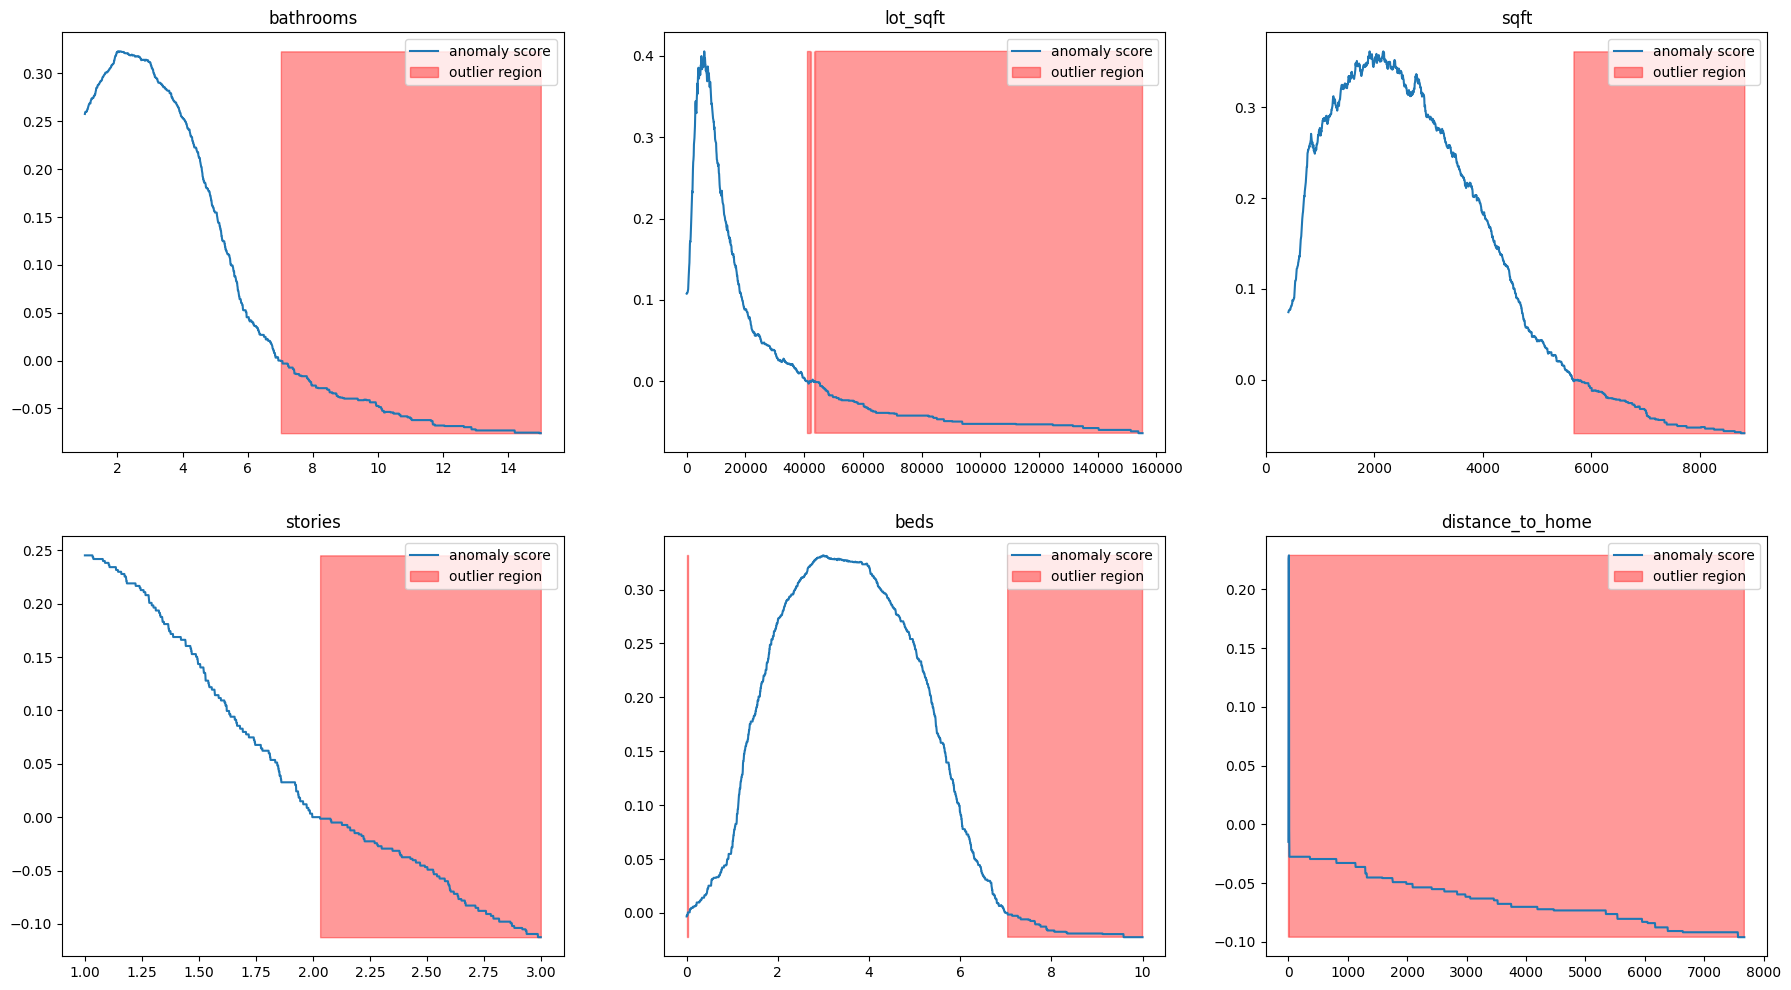

In [158]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

features_analysis = fg.features.copy()
features_analysis = ToDataFrame().fit_transform(features_analysis)
features_analysis['bathrooms'] = features_analysis[['baths_full', 'baths_3qtr', 'baths_half', 'baths_1qtr']].sum(axis=1)

cta = ['bathrooms', 'lot_sqft', 'sqft', 'stories', 'beds', 'distance_to_home']

fig, axs = plt.subplots(2, 3, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

outlier_flags = {}

for i, column in enumerate(cta):
    isolation_forest = IsolationForest(contamination = 0.005)
    isolation_forest.fit(features_analysis[column].values.reshape(-1,1))

    xx = np.linspace(features_analysis[column].min(), features_analysis[column].max(), len(features_analysis)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    outlier_flags[column] = outlier

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [159]:
fa2 = features_analysis.copy()

aggregate = np.zeros_like(fa2.shape[0])
for k, v in outlier_flags.items():
    fa2[f'{k}_outlier'] = v
    aggregate = np.add(aggregate, v)
fa2['agg_outlier'] = aggregate
fa2.head()

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,...,lat,long,bathrooms,bathrooms_outlier,lot_sqft_outlier,sqft_outlier,stories_outlier,beds_outlier,distance_to_home_outlier,agg_outlier
0,2713193735,0,0,6,1,0,0,1930,34665,5690,...,47.646588,-122.407809,7,1,1,1,1,-1,-1,2
1,2659298958,0,0,1,1,0,0,1979,6500,1660,...,47.729440,-122.324938,2,1,1,1,1,-1,1,4
2,1093027260,1,1,2,1,1,0,2012,1975,1780,...,47.587612,-122.309678,4,1,1,1,1,-1,1,4
3,1648537949,1,1,2,0,0,0,1962,7618,3310,...,47.574457,-122.303656,2,1,1,1,1,-1,-1,2
4,1757015623,1,1,3,2,0,0,1911,3376,2800,...,47.660596,-122.365015,5,1,1,1,1,-1,-1,2


In [160]:
fa2.agg_outlier.value_counts()

-6    537
 4    495
 2    284
-2    198
 0    156
-4    143
Name: agg_outlier, dtype: int64

In [162]:
fa2[fa2.agg_outlier == -6]
# Are these all the for sale listings? that would be about the proportion...

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,...,lat,long,bathrooms,bathrooms_outlier,lot_sqft_outlier,sqft_outlier,stories_outlier,beds_outlier,distance_to_home_outlier,agg_outlier
1276,1719861478,0,87,1,1,0,0,1935,11320,1270,...,47.512813,-122.368051,2,-1,-1,-1,-1,-1,-1,-6
1277,1434337867,0,86,2,1,0,0,1914,5100,2660,...,47.680906,-122.380736,3,-1,-1,-1,-1,-1,-1,-6
1278,2610517840,0,88,1,0,0,0,1930,8160,2110,...,47.502053,-122.349379,1,-1,-1,-1,-1,-1,-1,-6
1279,2056362789,0,84,1,0,1,0,1942,10998,1180,...,47.490609,-122.307863,2,-1,-1,-1,-1,-1,-1,-6
1280,2896673046,0,79,1,1,0,0,1941,9295,2220,...,47.712526,-122.358603,2,-1,-1,-1,-1,-1,-1,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,1627256650,0,128,1,1,1,0,1928,4452,2470,...,47.570625,-122.376388,3,-1,-1,-1,-1,-1,-1,-6
1809,1311822489,0,128,3,0,0,0,1953,8037,3610,...,47.671516,-122.274560,3,-1,-1,-1,-1,-1,-1,-6
1810,2102420682,0,128,1,1,0,0,1947,6395,2284,...,47.537290,-122.393758,2,-1,-1,-1,-1,-1,-1,-6
1811,2141376707,0,124,1,1,1,0,1945,5000,2380,...,47.658938,-122.287651,3,-1,-1,-1,-1,-1,-1,-6


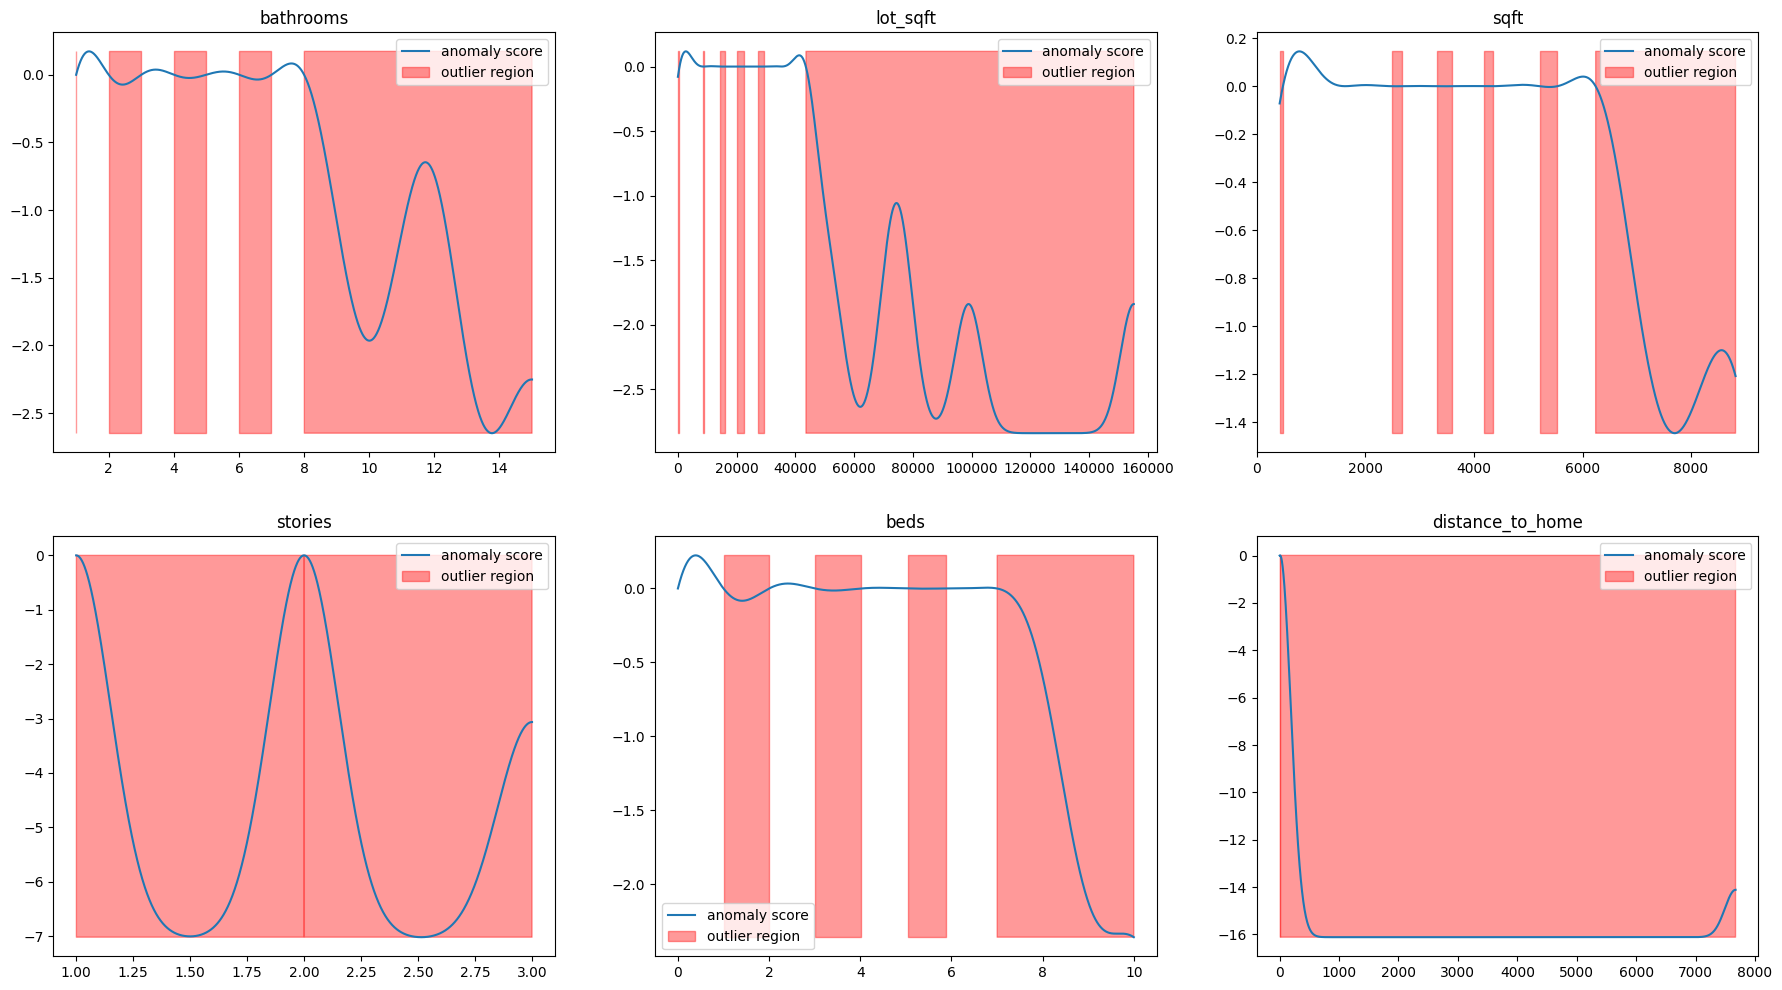

In [170]:
from sklearn.svm import OneClassSVM

features_analysis = fg.features.copy()
features_analysis = ToDataFrame().fit_transform(features_analysis)
features_analysis['bathrooms'] = features_analysis[['baths_full', 'baths_3qtr', 'baths_half', 'baths_1qtr']].sum(axis=1)

cta = ['bathrooms', 'lot_sqft', 'sqft', 'stories', 'beds', 'distance_to_home']

fig, axs = plt.subplots(2, 3, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

outlier_flags = {}

for i, column in enumerate(cta):
    isolation_forest = OneClassSVM(nu=0.01)
    isolation_forest.fit(features_analysis[column].values.reshape(-1,1))

    xx = np.linspace(features_analysis[column].min(), features_analysis[column].max(), len(features_analysis)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    outlier_flags[column] = outlier

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [30]:
target_transformer.inverse_transform(test_targets)[:5]

array([[480000.],
       [829000.],
       [565000.],
       [595000.],
       [545000.]])

In [194]:
pd.DataFrame(test_features)

,Property_ID,Days_listed,Days_updated,baths_full,baths_3qtr,baths_half,baths_1qtr,year_built,lot_sqft,sqft,garage,stories,beds,tags,new_construction,distance_to_home,angle_from_home
0,1531843762,0,91,2,0,0,0,1924,3605,1740,2,1,4,"[community_outdoor_space, dishwasher, fireplac...",False,7.934713,1.860656
1,2418865579,0,0,1,0,0,0,1947,4000,1120,0,1,3,[],False,3.747811,1.375507
2,1150305596,0,82,3,1,1,0,2006,10392,4693,2,1,5,"[central_air, community_outdoor_space, communi...",False,2.413289,1.069091
3,1591827592,0,60,3,2,0,0,1906,4666,4190,1,1,7,"[community_outdoor_space, den_or_office, dinin...",False,7.225283,1.174941
4,2800110782,0,54,1,1,1,0,2012,6324,2695,2,1,3,"[community_outdoor_space, den_or_office, dinin...",False,8.486626,1.404790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2966831334,0,64,3,0,0,0,2019,6900,3590,2,1,5,"[central_air, community_outdoor_space, communi...",False,9.015371,1.977319
177,2285523482,0,16,2,0,1,0,1977,13955,2940,2,1,3,"[community_outdoor_space, den_or_office, dinin...",False,10.800445,1.435493
178,1123506309,157,2,3,0,2,0,1992,12474,4430,3,1,4,"[community_outdoor_space, community_security_f...",False,5.729512,-2.597316
179,1553932500,0,81,2,0,0,0,1951,4560,1440,0,1,4,"[community_outdoor_space, dining_room, dishwas...",False,4.897272,-2.488082
